In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


In [3]:
# File path
data_path = '/content/drive/MyDrive/Billionaire.csv'

In [4]:
# Read the file into pandas dataframe
data = pd.read_csv(data_path)

In [5]:
# First 5 rows
data.head()


,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [31]:
data.describe()

,NetWorth,Rank,Age
count,2755.000000,2755.000000,2755.000000
mean,4.749220,1345.663521,63.113602
std,9.615358,772.669811,13.250909
min,1.000000,1.000000,18.000000
25%,1.500000,680.000000,54.000000
50%,2.300000,1362.000000,63.000000
75%,4.200000,2035.000000,72.000000
max,177.000000,2674.000000,99.000000


In [7]:
# Check for missing values
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [8]:
# Fill the missing values in the age column with the mean age as it has 79 null values
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [9]:
data.shape

(2755, 7)

<ipython-input-10-0ee3aa59c3a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


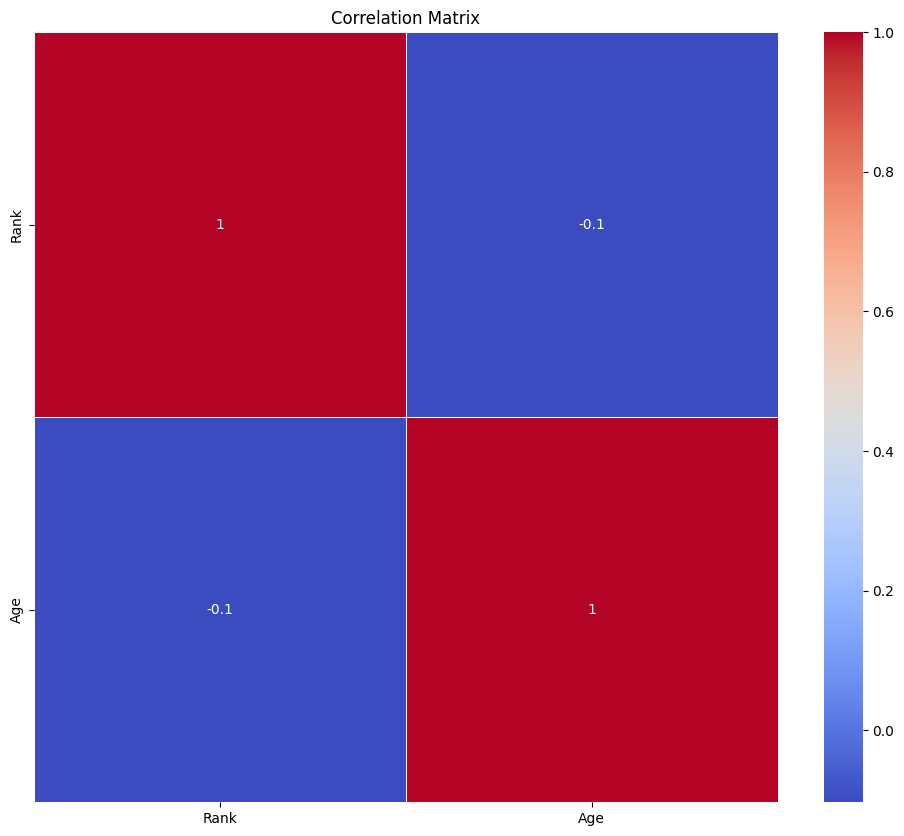

In [10]:
# correlation
corr = data.corr()
plt.figure(figsize=(12, 10))

# Create a Heatmap
sns.heatmap(corr, annot=True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

The correlation matrix presented here examines the relationships between two key variables, "Rank" and "Age," within the dataset. Correlation coefficients were calculated to quantify the strength and direction of these relationships.

Below is an interpretation of the values:

Rank vs. Rank (Self-Correlation): The correlation coefficient for "Rank" compared to itself is 1. This value is unsurprising since a variable is perfectly correlated with itself, and it serves as a reference point for the other correlations.

Age vs. Age (Self-Correlation): Similarly, the correlation coefficient for "Age" compared to itself is 1, indicating self-correlation.

Rank vs. Age: The correlation coefficient between "Rank" and "Age" is approximately -0.1. This negative sign implies a weak negative correlation between the two variables. In practical terms, this suggests that there might be a slight tendency for individuals with higher ranks to be slightly older. However, it is crucial to note that this correlation is weak, meaning that the linear relationship between "Rank" and "Age" is not substantial.

The correlation matrix reveals that "Rank" and "Age" exhibit a relatively weak negative linear relationship. This implies that as "Rank" decreases (meaning a higher rank), there is a minor increase in "Age."

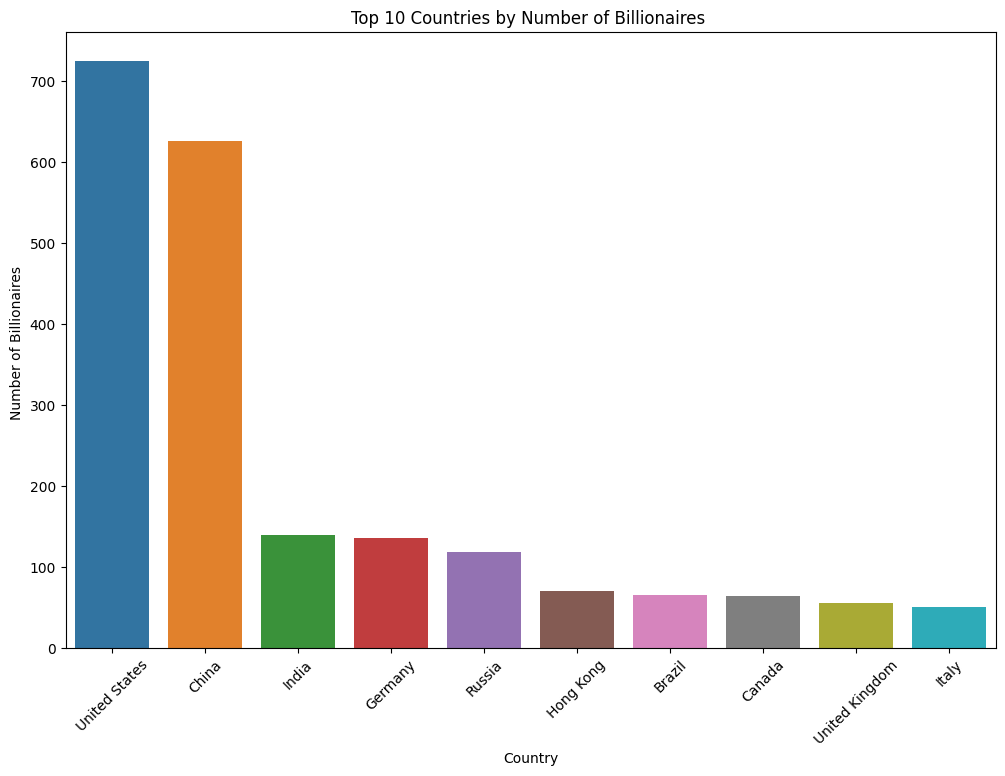

In [11]:
# A bar plot of the top 10 countries by the number of billionaires
top_10_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(x = top_10_countries.index, y = top_10_countries.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Billionaires ')
plt.title('Top 10 Countries by Number of Billionaires ')
plt.show()


The United States leads the world in the number of billionaires, with 735, followed by China with 495, India with 169, Germany with 126, and Russia with 105. Hong Kong, Canada, the United Kingdom, and Italy round out the top 10, with 66, 63, 52, and 64 billionaires, respectively.

This data suggests that the United States is still the global leader in terms of wealth creation, despite the rise of China in recent years. India is also a rapidly emerging market, with a growing number of billionaires. Germany and Russia are two other traditional economic powers with a significant number of billionaires.

Hong Kong is a financial hub that attracts wealthy people from all over the world. Canada, the United Kingdom, and Italy are also developed economies with a strong entrepreneurial tradition.

The concentration of billionaires in a small number of countries raises questions about inequality and the distribution of wealth. It also highlights the importance of economic growth and job creation in all countries.

In [12]:
# Calculate the average age of billionaires
average_age = data['Age'].mean()
average_age

63.1136023916293

In [13]:
# Remove non-numeric characters from the 'NetWorth' column and convert it to a float
data['NetWorth'] = data['NetWorth'].str.replace('$', '').str.replace('B', '').astype(float)

# Find the top 5 richest individuals
richest_individuals = data.nlargest(5, 'NetWorth')


<ipython-input-13-8f6045e4580e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['NetWorth'] = data['NetWorth'].str.replace('$', '').str.replace('B', '').astype(float)


In [14]:
# The top 5 richest individuals
richest_individuals.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [15]:
# Filter billionaires from the United States
us_billionaires = data[data['Country'] == 'United States'].head()

In [16]:
# Subset data for the 'Technology' industry
tech_billionaires = data[data['Industry'] == 'Technology'].head()
print(tech_billionaires)

In [17]:
# Group billionaires by country and calculate the average net worth in each country
avg_net_worth_by_country = data.groupby('Country')['NetWorth'].mean().head()
print(avg_net_worth_by_country)


Country
Algeria           4.800000
Argentina         3.060000
Australia         4.125000
Austria           5.225000
Belgium           4.200000
                    ...   
United Kingdom    3.819643
United States     6.075138
Venezuela         3.200000
Vietnam           2.783333
Zimbabwe          1.500000
Name: NetWorth, Length: 70, dtype: float64


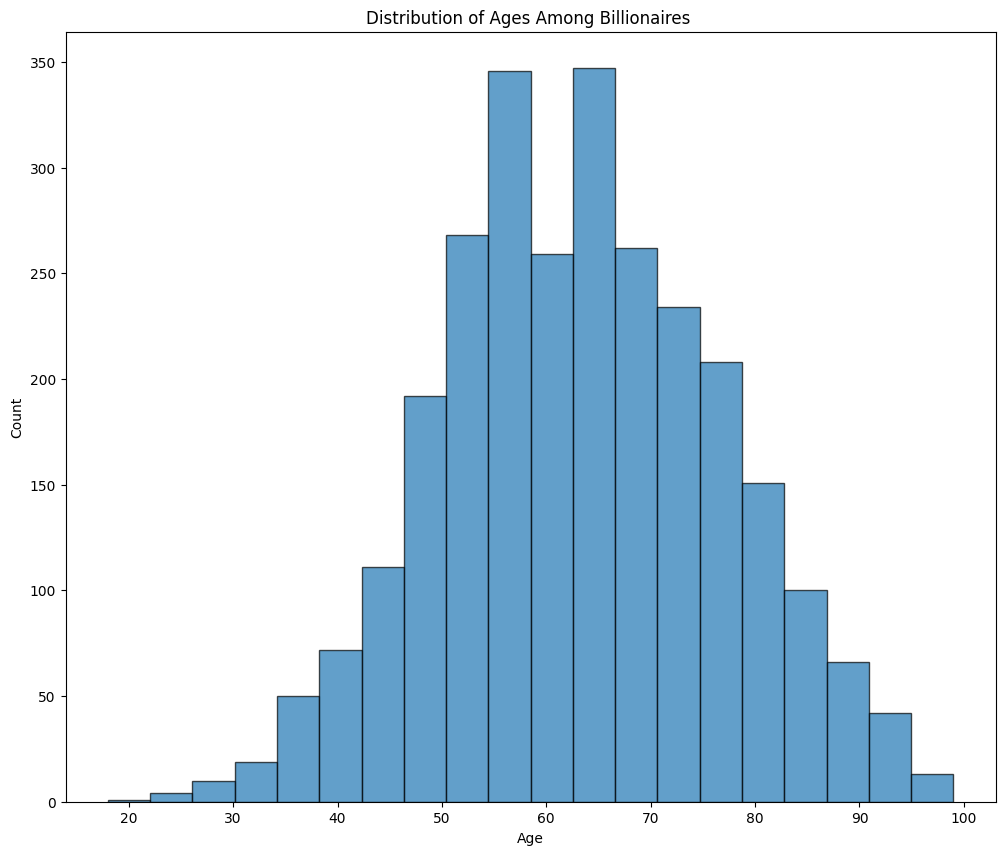

In [18]:
# Plot the histogram
plt.figure(figsize = (12,10))
num_bins = 20
plt.hist(data['Age'].dropna(), bins = num_bins, edgecolor = 'k', alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages Among Billionaires ')
plt.show()

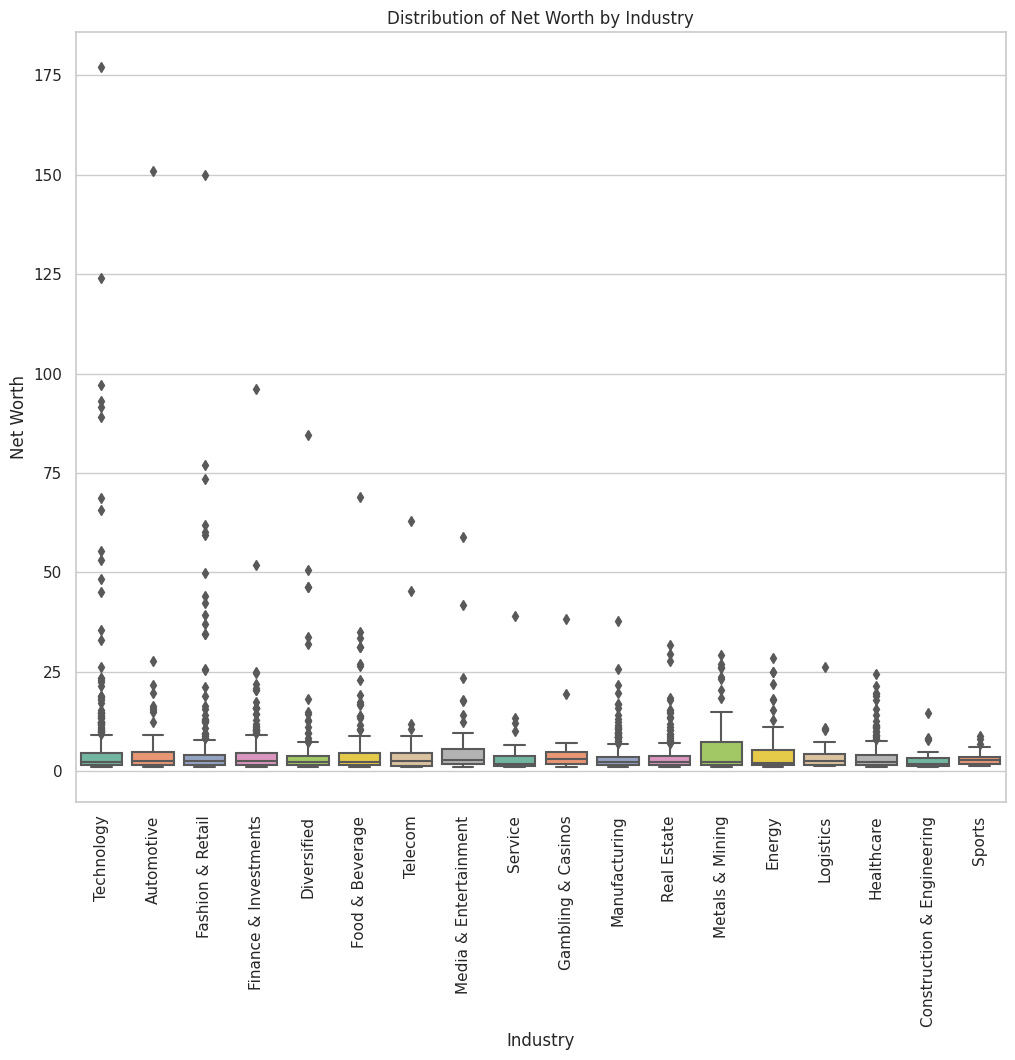

In [19]:
# Box_Plot
plt.figure(figsize = (12,10))
sns.set(style='whitegrid')
sns.boxplot(x = 'Industry', y ='NetWorth', data = data, palette = 'Set2')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Net Worth')
plt.title('Distribution of Net Worth by Industry')
plt.show()

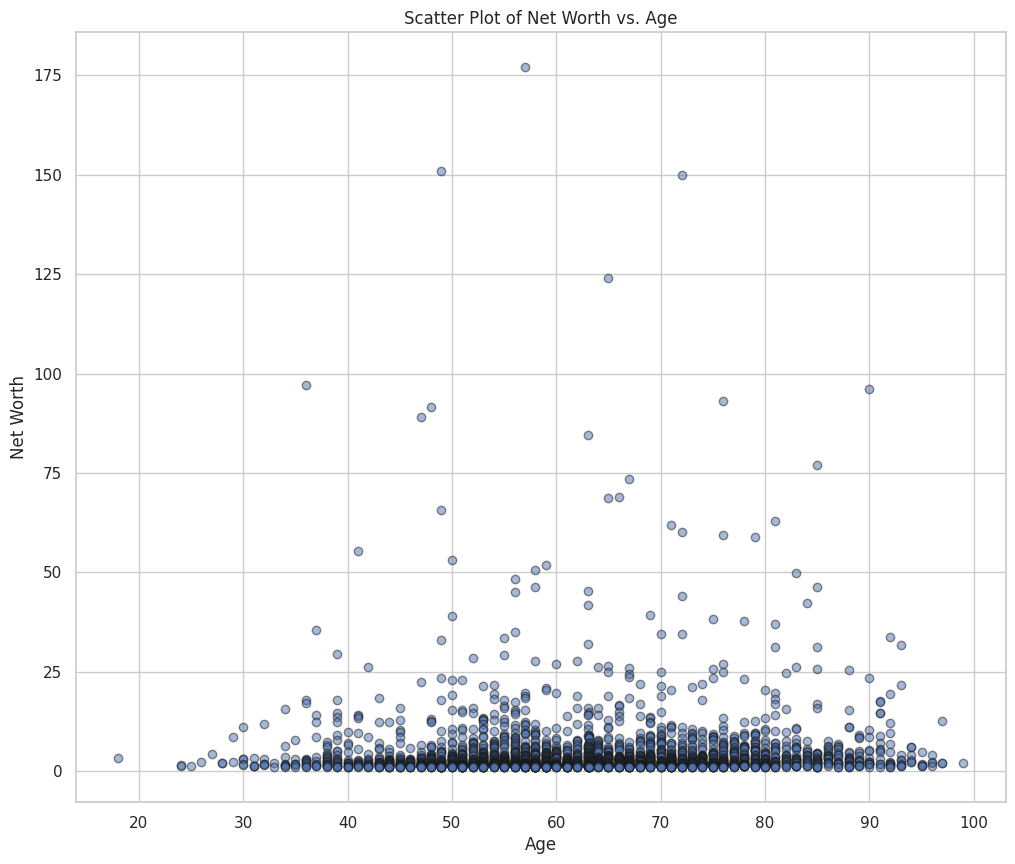

In [20]:
# Scatter Plot
plt.figure(figsize = (12,10))
plt.scatter(data['Age'], data['NetWorth'], alpha=0.5, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title('Scatter Plot of Net Worth vs. Age')
plt.show()

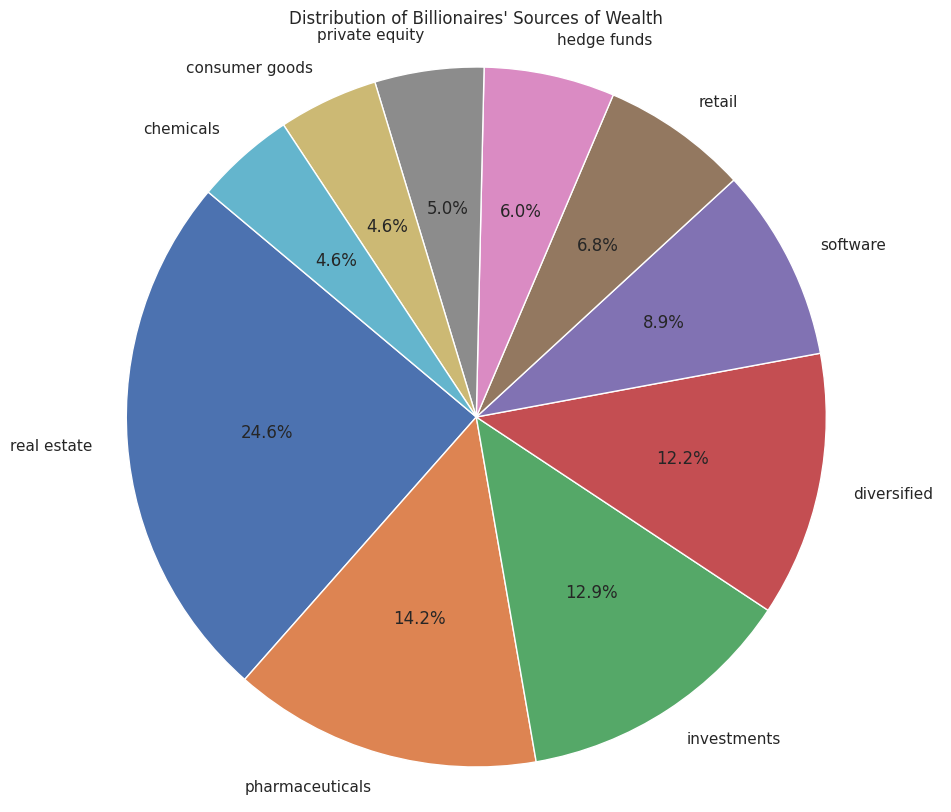

In [21]:
# Pie Chart for distribution of billionaires
plt.figure(figsize = (12,10))
source_counts = data['Source'].value_counts().head(10)
plt.pie(source_counts, labels = source_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Billionaires\' Sources of Wealth')
plt.show()

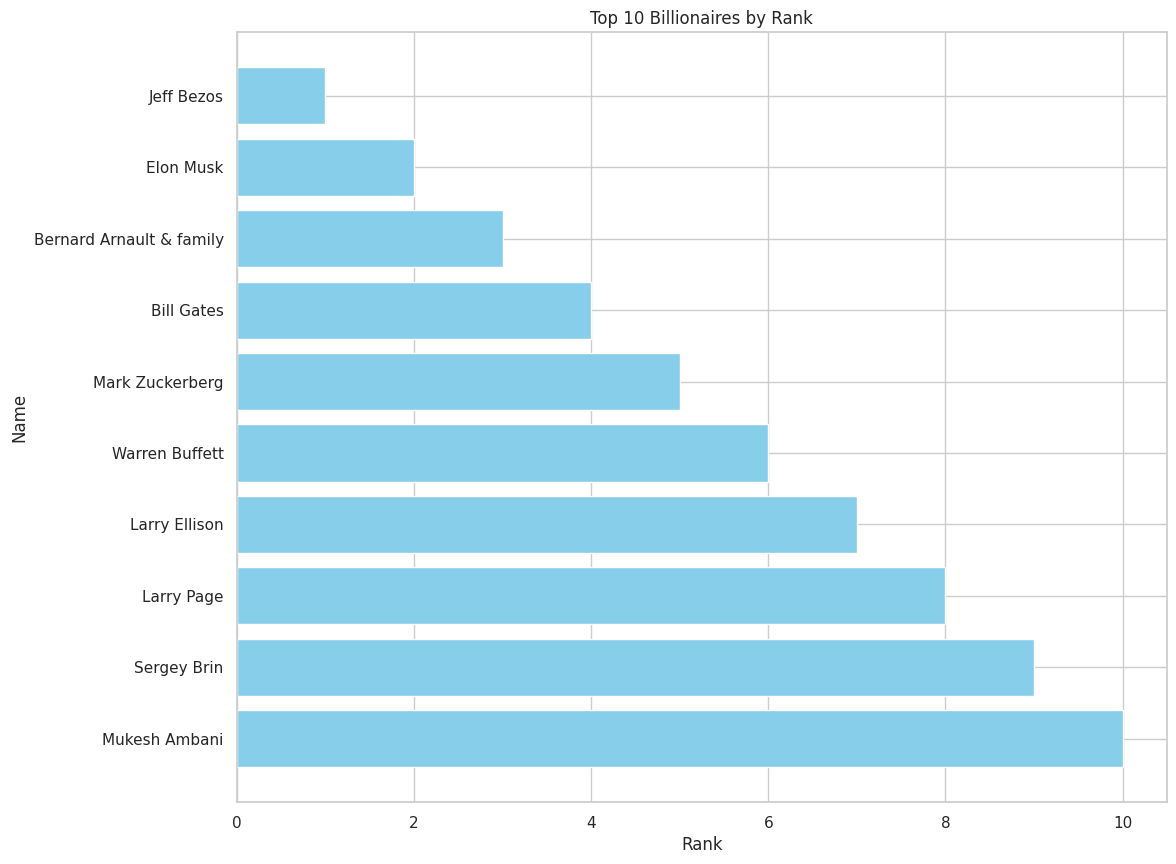

In [22]:
top_n = 10
top_billionaires = data.sort_values(by='Rank').head(top_n)
plt.figure(figsize = (12,10))

# Plot the bar plot
plt.barh(top_billionaires['Name'], top_billionaires['Rank'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Rank')
plt.ylabel('Name')
plt.title(f'Top {top_n} Billionaires by Rank')
plt.show()

<Figure size 1200x1000 with 0 Axes>

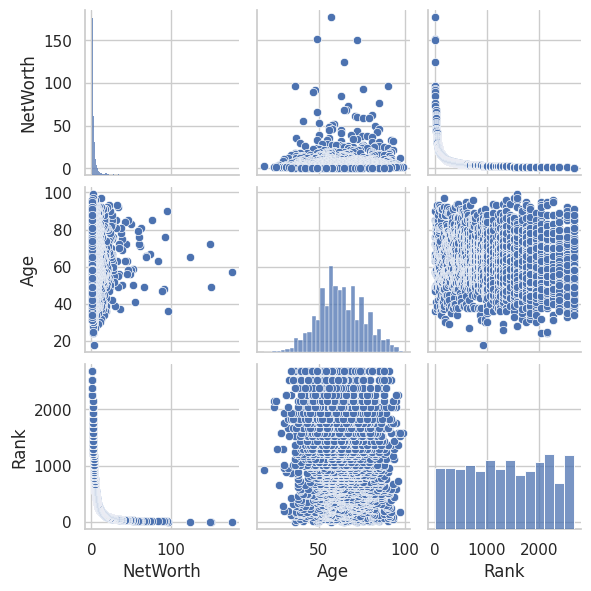

In [23]:
# Pair Plot
# Let's select the numerical columns for the pair plot
plt.figure(figsize = (12,10))
numerical_Cols = ['NetWorth', 'Age', 'Rank']
sns.pairplot(data[numerical_Cols], height = 2)
plt.show()

In [24]:
import plotly.express as px

# Create a geospatial map
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',  # Use country names as locations
                    color='NetWorth',  # Color the map by NetWorth
                    hover_name='Country',  # Display country names on hover
                    color_continuous_scale='Viridis',  # Color scale
                    title='Geographic Distribution of Billionaires by Net Worth')

# Show the map
fig.show()


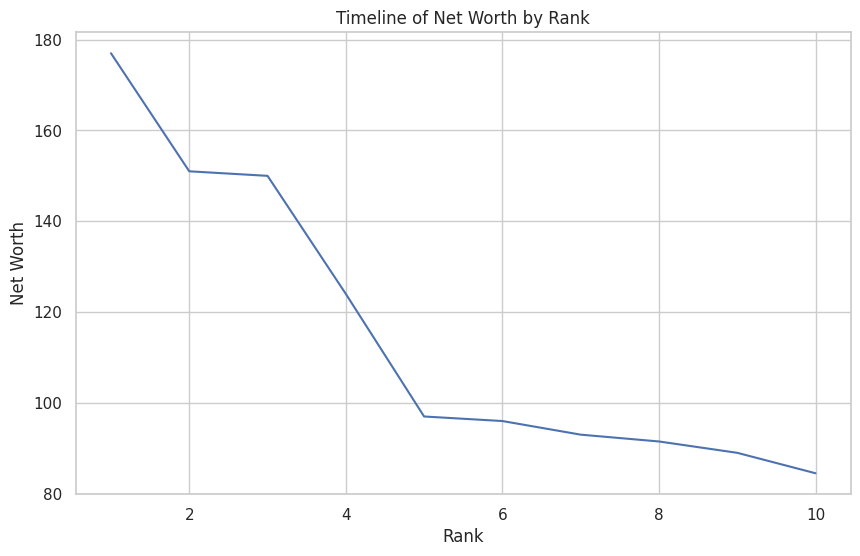

In [25]:
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(top_billionaires['Rank'], top_billionaires['NetWorth'])
plt.xlabel('Rank')
plt.ylabel('Net Worth')
plt.title('Timeline of Net Worth by Rank')
plt.show()



Summary of Global Billionaires Analysis:

The analysis of global billionaires provides valuable insights into the business environment of countries and the factors that contribute to the success of businesses and startups. This analysis is particularly illuminating, as it sheds light on patterns and trends among the world's wealthiest individuals.

One of the standout findings from this analysis is the concentration of billionaires in specific countries, notably China and the United States. These two countries are home to a significant portion of the world's billionaires. This concentration suggests a favorable business environment that fosters entrepreneurial success, innovation, and wealth accumulation.

Key Takeaways:

1. Global Distribution of Billionaires: The data shows a notable disparity in the distribution of billionaires across different countries. China and the United States stand out as the leading countries with the highest number of billionaires.

2. Business Environment Impact: The prominence of China and the United States as billionaire hubs underscores the importance of a conducive business environment. Factors such as infrastructure, economic stability, access to capital, and innovation ecosystems play a vital role in fostering entrepreneurship and business success.

3. Startup Success: The analysis implies that these countries offer a more supportive atmosphere for startups and businesses. Entrepreneurs in these regions may benefit from a robust infrastructure, access to venture capital, and a culture of innovation.

4. Global Economic Influence: China and the United States not only drive their national economies but also wield significant global economic influence. Their entrepreneurial ecosystems attract talent and capital from around the world.

In conclusion, the global billionaire analysis highlights the critical role of a favorable business environment in shaping the success of businesses and startups. Understanding these patterns can be invaluable for aspiring entrepreneurs, investors, and policymakers, as they seek to create thriving entrepreneurial ecosystems and contribute to the global business landscape.
